Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [8]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [5]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [6]:
b1 = np.cov(salary, scoring, ddof=1)[0, 1] / np.var(salary, ddof = 1)
b1

2.620538882402765

In [7]:
b0 = scoring.mean() - b1 * salary.mean()
b0

444.1773573243596

Text(0, 0.5, 'КС')

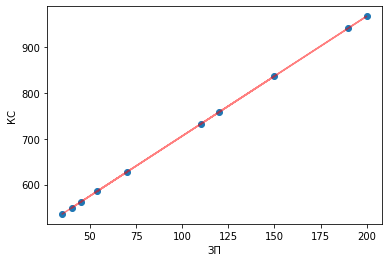

In [10]:
x = salary
y = b0 + b1 * x

plt.scatter(x, y)
plt.plot(x, y, color='red', alpha=0.5)

plt.xlabel('ЗП')
plt.ylabel('КС')

In [20]:
ones = np.ones((salary.shape[0], 1))


In [18]:

salary_matrix = np.hstack((ones, salary.reshape(-1, 1)))
salary_matrix.shape

(10, 2)

In [19]:
salary_matrix

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [21]:
XTX = salary_matrix.T.dot(salary_matrix)
XTX

array([[1.00000e+01, 1.01400e+03],
       [1.01400e+03, 1.37766e+05]])

In [23]:
XTX_inv = np.linalg.inv(XTX)

In [24]:
b = XTX_inv.dot(salary_matrix.T).dot(scoring.reshape(-1, 1))
b

array([[444.17735732],
       [  2.62053888]])

Следовательно наша модель регрессии имеет вид 
scoring = 444.177 + 2.620 * salary

In [27]:
scoring_pred = b0 + b1 * salary

scoring_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [26]:
scoring

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [29]:
R1 = 1 - (scoring_pred - scoring).var() / scoring.var()
R1

0.7876386635293686

78% дисперсии переменной scoring объясняются моделью.

In [33]:
mean_approx_error = np.abs((scoring - scoring_pred) / scoring).mean()
mean_approx_error

0.11469251843561709

Т.к mean_approx_error превышает 10 процентов то можно сказать что теоритические данные могут отличаться от тех которые выдет модель лин регрессии

In [34]:
k1 = 1
n = scoring.shape[0]
k2 = n - k1 - 1

In [35]:
F = (R1 / k1) / ((1 - R1) / k2)
F

29.67164085966451

In [36]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

F > F_crit следовательно уравнение регрессии статистически значимо.

In [37]:
standard_err_slope = np.sqrt((((scoring - scoring_pred) ** 2).sum() / (n - 2)) / ((salary - salary.mean()) ** 2).sum())
standard_err_slope

0.48108279568516005

In [38]:
t = stats.t.ppf(1 - alpha / 2, df = n - 2)
t

2.3060041350333704

In [39]:
(b1 - t * standard_err_slope, b1 + t * standard_err_slope)

(1.5111599662593718, 3.729917798546158)

Доверительный интервал для параметра b1 - (1.5111599662593718, 3.729917798546158)

In [40]:
standart_err_intercept = standard_err_slope * np.sqrt((salary ** 2).mean())
standart_err_intercept

56.46649755068153

In [41]:
(b0 - t * standart_err_intercept, b0 + t * standart_err_intercept)

(313.9653804816363, 574.3893341670829)

Доверительный интервал для параметра b0 - (313.9653804816363, 574.3893341670829)

Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?


Для ответа на этот вопрос необходимо провести однофакторный дисперсионный анализ и проверить гипотезу H0 о равенстве средних значений по каждой выборке.
Требуется проверить гипотезу у равенстве среднего значения кредитного скролинга по каждой группе.

1) Для 3 выборок необходимо найти среднее

2) собрать все значения в один массив и также найти среднее.

3) найти сумму квадратов отклонений наблюдений от общего среднего по формулам 
отклонения дисперсии между группами

S2_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2
отклонения внутри групп
S2_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

4) найти оценки дисперсии:
k = 3
n = n1 + n2 + n3
k1 = k - 1
k2 = n - k
sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

5) Получить значение статистики F = sigma2_b / sigma2_w

6) Для определенного уровня значимости alpha найти критическое значение F_crit:
    F_crit = stats.f.ppf(1 - alpha, k1, k2)    
7) Если  𝐹>𝐹𝑐𝑟𝑖𝑡 , заключаем, что отличие действительно является статистически значимым.



Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
"x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],

"y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],

"x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],

"y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],

"x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],

"y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],

"x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],

"y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [44]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [45]:
MX1 = x1.mean()
MY1 = y1.mean()

MX2 = x2.mean()
MY2 = y2.mean()

MX3 = x3.mean()
MY3 = y3.mean()

MX4 = x4.mean()
MY4 = y4.mean()

In [47]:
print(MX1, MY1)
print(MX2, MY2)
print(MX3, MY3)
print(MX4, MY4)

9.0 7.500909090909093
9.0 7.50090909090909
9.0 7.5
9.0 7.500909090909091


In [61]:
DX1 = x1.var(ddof=1)
DX2 = x2.var(ddof=1)
DX3 = x3.var(ddof=1)
DX4 = x4.var(ddof=1)

DY1 = y1.var(ddof=1)
DY2 = y2.var(ddof=1)
DY3 = y3.var(ddof=1)
DY4 = y4.var(ddof=1)

In [62]:
print(DX1, DY1)
print(DX2, DY2)
print(DX3, DY3)
print(DX4, DY4)

11.0 4.127269090909091
11.0 4.127629090909091
11.0 4.12262
11.0 4.123249090909091


In [48]:
cov1 = ((x1 - MX1) * (y1 - MY1)).sum() / (x1.shape[0] - 1)
cov2 = ((x2 - MX2) * (y2 - MY2)).sum() / (x2.shape[0] - 1)
cov3 = ((x3 - MX3) * (y3 - MY3)).sum() / (x3.shape[0] - 1)
cov4 = ((x4 - MX4) * (y4 - MY4)).sum() / (x4.shape[0] - 1)

In [49]:
print(cov1)
print(cov2)
print(cov3)
print(cov4)

5.501
5.499999999999999
5.497
5.4990000000000006


In [89]:
X1_std = x1.std(ddof=1)
X2_std = x2.std(ddof=1)
X3_std = x3.std(ddof=1)
X4_std = x4.std(ddof=1)

Y1_std = y1.std(ddof=1)
Y2_std = y2.std(ddof=1)
Y3_std = y3.std(ddof=1)
Y4_std = y4.std(ddof=1)

In [90]:
print(X1_std, Y1_std)
print(X2_std, Y2_std)
print(X3_std, Y3_std)
print(X4_std, Y4_std)

3.3166247903554 2.031568135925815
3.3166247903554 2.0316567355016177
3.3166247903554 2.030423601123667
3.3166247903554 2.0305785113876023


In [91]:
rxy1 = cov1 / (X1_std * Y1_std)
rxy2 = cov2 / (X2_std * Y2_std)
rxy3 = cov3 / (X3_std * Y3_std)
rxy4 = cov4 / (X4_std * Y4_std)

In [95]:
print(rxy1)
print(rxy2)
print(rxy3)
print(rxy4)

0.8164205163448399
0.8162365060002428
0.8162867394895982
0.816521436888503


In [98]:
b1_1 = cov1 / DX1
b1_2 = cov2 / DX2
b1_3 = cov3 / DX3
b1_4 = cov4 / DX4

In [99]:
b0_1 = MY1 - b1_1 * MX1
b0_2 = MY2 - b1_2 * MX2
b0_3 = MY3 - b1_3 * MX3
b0_4 = MY4 - b1_4 * MX4

In [100]:
print(f'y1 = {round(b0_1, 4)} + {round(b1_1, 4)} * x1')
print(f'y2 = {round(b0_2, 4)} + {round(b1_2, 4)} * x1')
print(f'y3 = {round(b0_3, 4)} + {round(b1_3, 4)} * x1')
print(f'y4 = {round(b0_4, 4)} + {round(b1_4, 4)} * x1')

y1 = 3.0001 + 0.5001 * x1
y2 = 3.0009 + 0.5 * x1
y3 = 3.0025 + 0.4997 * x1
y4 = 3.0017 + 0.4999 * x1


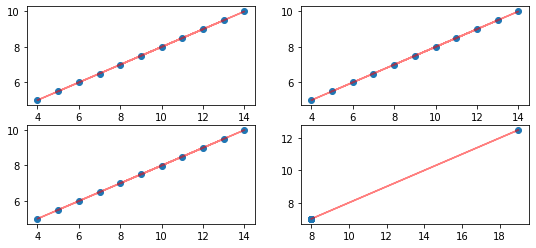

In [103]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(9, 4)

X1 = x1
Y1 = b0_1 + b1_1 * X1

X2 = x2
Y2 = b0_2 + b1_2 * X2

X3 = x3
Y3 = b0_3 + b1_3 * X3

X4 = x4
Y4 = b0_4 + b1_4 * X4

ax1.scatter(X1, Y1)
ax1.plot(X1, Y1, color='red', alpha=0.5)

ax2.scatter(X2, Y2)
ax2.plot(X2, Y2, color='red', alpha=0.5)

ax3.scatter(X3, Y3)
ax3.plot(X3, Y3, color='red', alpha=0.5)

ax4.scatter(X4, Y4)
ax4.plot(X4, Y4, color='red', alpha=0.5)

plt.show()